In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import plot_model
from IPython.display import display, Image
from tensorflow import keras

In [2]:
def display_model(model):
    plot_model(model, "_model.png",show_shapes=True, dpi=150)
    display(Image(filename='_model.png'))

# Simple model using Sequential API

In [3]:
# Sequential API declaration
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [4]:
# Declare in a list structure
model = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

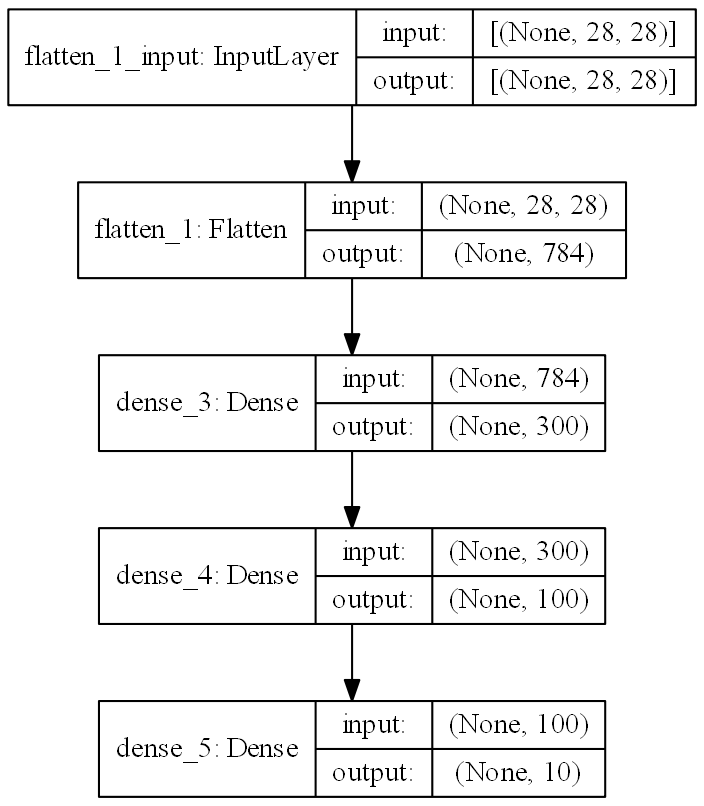

In [5]:
display_model(model)

In [6]:
# displays all the model layers, showing its connection and number of parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
# fetch a layer by index or by name
hidden1 = model.layers[1]
# model.get_layer('dense')

In [8]:
# get_weight return numpy array, whereas trainable_weights return tensor
model.trainable_weights
model.get_weights()

[array([[ 0.03498948,  0.03057834,  0.01904871, ...,  0.0260074 ,
          0.00012383,  0.03631856],
        [-0.04526168, -0.00562939,  0.06997876, ..., -0.06041733,
         -0.01644143,  0.0196468 ],
        [-0.06742428, -0.06721108,  0.03802671, ...,  0.06080885,
          0.06197953,  0.05767928],
        ...,
        [-0.02920726,  0.0470721 ,  0.01509193, ..., -0.04518834,
         -0.03181378, -0.03254103],
        [-0.05224532, -0.04149656, -0.05109937, ...,  0.05417752,
         -0.02784817, -0.01926409],
        [ 0.01747204, -0.00795969, -0.03044767, ..., -0.00361345,
          0.01178484, -0.0288158 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [9]:
# compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Building Complex Models using Functional API

In [10]:
input_ = Input(shape=(28,28))
hidden1 = Dense(30, activation='relu')(input_)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = Dense(1)(concat)
model = Model(inputs=[input_], outputs=[output])

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 28, 30)       870         input_1[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 28, 30)       930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_1[0][0]                    
                                                                 dense_7[0][0]                

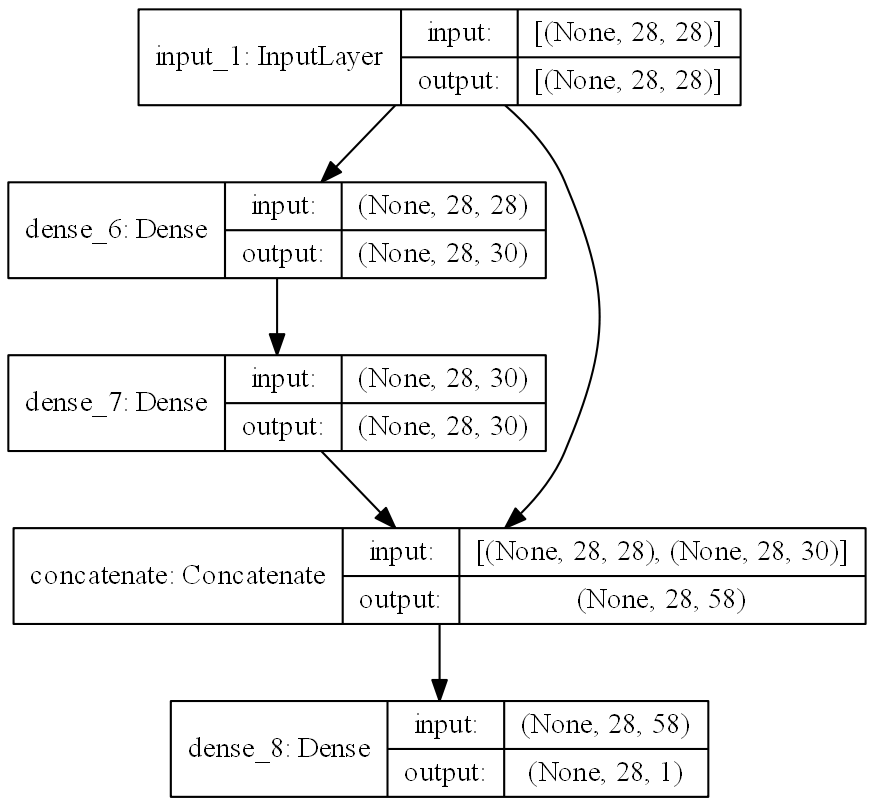

In [12]:
display_model(model)

In [13]:
input_A = Input([5], name='wide_input')
input_B = Input([6], name='deep_input')
hidden1 = Dense(30, activation='relu')(input_B)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([hidden2, input_A])
output = Dense(1, name='output')(concat)
aux_output = Dense(1, name='aux_output')(hidden2)
model = Model(inputs=[input_A, input_B], outputs=[output, aux_output])

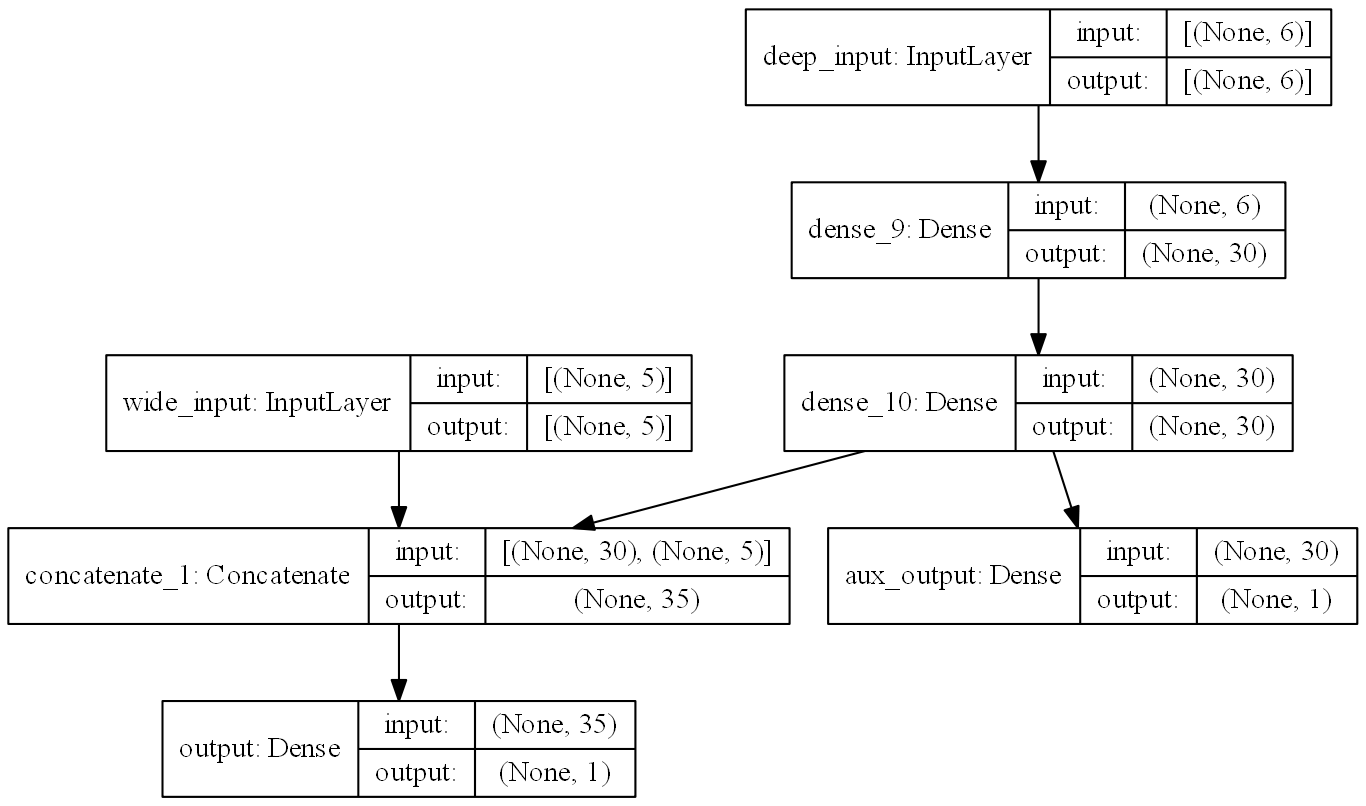

In [14]:
display_model(model)

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           930         dense_9[0][0]                    
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
____________________________________________________________________________________________